[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/18MY8Rd2t2N8HwbfaVWE4c3iE6h7YLYqZ?usp=sharing)

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.6 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=53dd89bb9309728b082b787a6c12a6fa6b802f1e5e9a9c0b2439f6080a9ccb62
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/cinemaTicket_Ref.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


## Data Preprocessing

- Checking for missing values.
  - Missing Values: There were some missing values in the occu_perc and capacity columns.
- Converting categorical variables (if any) into a format suitable for analysis.
  - Converted the date column to a datetime format and extracted year and weekday as new features.
- Normalizing or standardizing numerical features.
 - Standardized the numerical features (total_sales, tickets_sold, etc.) for uniformity.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Convert 'date' to datetime format and extract relevant features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['weekday'] = data['date'].dt.weekday

# Dropping the original 'date' column as we have extracted year, month, and day
data = data.drop(columns=['date'])

# Standardizing numerical features
from sklearn.preprocessing import StandardScaler

numerical_features = ['total_sales', 'tickets_sold', 'tickets_out', 'show_time', 'occu_perc',
                      'ticket_price', 'ticket_use', 'capacity', 'year', 'month', 'quarter', 'day', 'weekday']

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the dataset after preprocessing and the missing values information
preprocessed_data_head = data.head()
missing_values_summary = missing_values.to_string()

preprocessed_data_head, missing_values_summary


(   film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
 0       1492          304    -0.275562     -0.407987    -0.081217   0.022216   
 1       1492          352    -0.293177     -0.350795    -0.081217   0.349413   
 2       1492          489    -0.319274     -0.386540    -0.081217   0.022216   
 3       1492          429    -0.363639     -0.458030    -0.081217  -0.959374   
 4       1492          524    -0.363639     -0.447307    -0.081217  -0.304981   
 
    occu_perc  ticket_price  ticket_use  capacity     month   quarter  \
 0  -0.693318      2.068973   -0.407421 -0.256417 -0.809192 -0.783907   
 1  -0.524690     -0.037146   -0.350189 -0.351397 -0.809192 -0.783907   
 2   0.001501     -0.037146   -0.385959 -0.728898 -0.809192 -0.783907   
 3  -0.395349      0.564602   -0.457499 -0.782416 -0.809192 -0.783907   
 4  -0.145497     -0.037146   -0.446768 -0.802360 -0.809192 -0.783907   
 
         day  year   weekday  
 0 -1.241707   0.0  0.990558  
 1 -1.2417

In [ ]:
# Checking the percentage of missing values in 'occu_perc' and 'capacity'
missing_percentage = data[['occu_perc', 'capacity']].isnull().mean() * 100

# Removing rows with missing values since they are a small percentage of the dataset
cleaned_data = data.dropna()

# Display the cleaned dataset and the percentage of missing values
cleaned_data_head = cleaned_data.head()
missing_percentage_summary = missing_percentage.to_string()

cleaned_data_head, missing_percentage_summary


(   film_code  cinema_code  total_sales  tickets_sold  tickets_out  show_time  \
 0       1492          304    -0.275562     -0.407987    -0.081217   0.022216   
 1       1492          352    -0.293177     -0.350795    -0.081217   0.349413   
 2       1492          489    -0.319274     -0.386540    -0.081217   0.022216   
 3       1492          429    -0.363639     -0.458030    -0.081217  -0.959374   
 4       1492          524    -0.363639     -0.447307    -0.081217  -0.304981   
 
    occu_perc  ticket_price  ticket_use  capacity     month   quarter  \
 0  -0.693318      2.068973   -0.407421 -0.256417 -0.809192 -0.783907   
 1  -0.524690     -0.037146   -0.350189 -0.351397 -0.809192 -0.783907   
 2   0.001501     -0.037146   -0.385959 -0.728898 -0.809192 -0.783907   
 3  -0.395349      0.564602   -0.457499 -0.782416 -0.809192 -0.783907   
 4  -0.145497     -0.037146   -0.446768 -0.802360 -0.809192 -0.783907   
 
         day  year   weekday  
 0 -1.241707   0.0  0.990558  
 1 -1.2417

**Missing Values:** The missing values in both occu_perc and capacity represented approximately 0.088% of the dataset, which is a very small fraction. Therefore, we have removed the rows with these missing values.

**Cleaned Data:** The dataset is now cleaned, with no missing values.

## Dimensionality Reduction using UMAP
We will use UMAP (Uniform Manifold Approximation and Projection) to reduce the dimensionality of the data. This will help us visualize the dataset and can also improve the performance of subsequent clustering and classification tasks.

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
<ipython-input-9-0acb56051273>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='UMAP_1', y='UMAP_2', data=umap_df, palette=sns.color_palette("hsv", 10), legend="full", alpha=0.7)


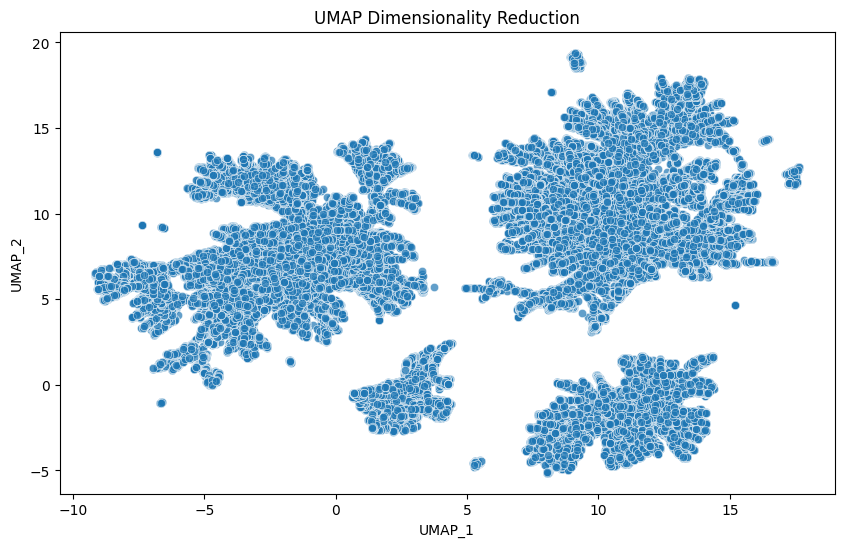

In [ ]:
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting features for UMAP
features_for_umap = cleaned_data.drop(columns=['film_code', 'cinema_code'])

# Performing UMAP dimensionality reduction
umap_model = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_results = umap_model.fit_transform(features_for_umap)

# Creating a DataFrame for the UMAP results
umap_df = pd.DataFrame(umap_results, columns=['UMAP_1', 'UMAP_2'])

# Plotting the UMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP_1', y='UMAP_2', data=umap_df, palette=sns.color_palette("hsv", 10), legend="full", alpha=0.7)
plt.title('UMAP Dimensionality Reduction')
plt.show()

## Clustering
After reducing dimensions, we'll apply a clustering algorithm (like K-Means or DBSCAN) to the reduced data to identify distinct groups or patterns.

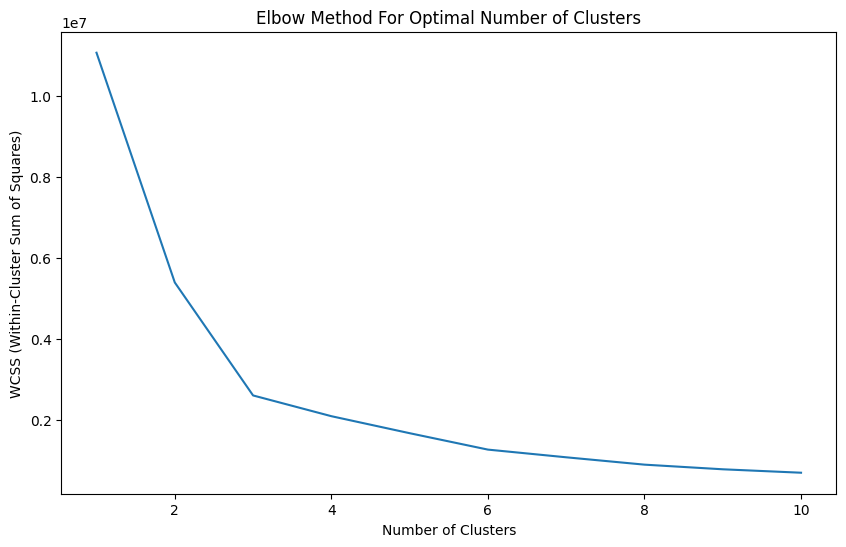

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Determining the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(umap_df)
    wcss.append(kmeans.inertia_)

# Plotting the results of the Elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


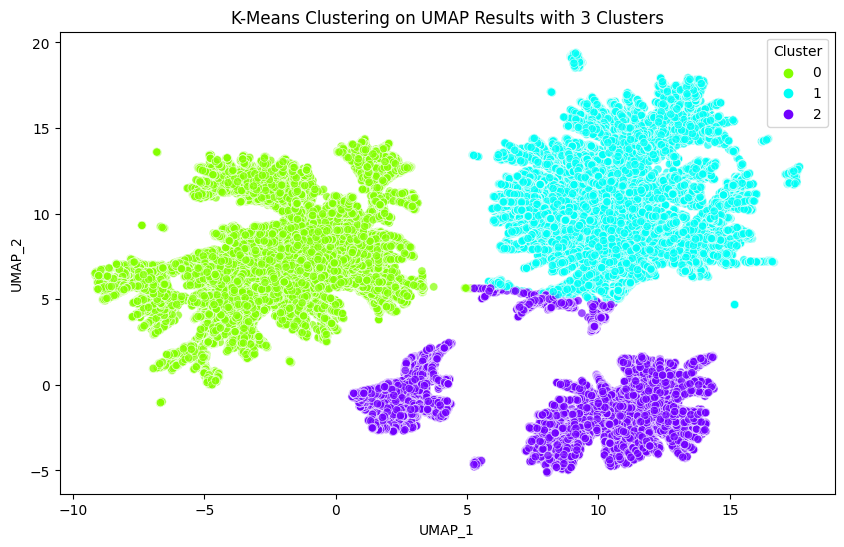

In [ ]:
# Performing K-Means Clustering on UMAP Results
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
umap_cluster_labels = kmeans.fit_predict(umap_df)

# Adding the cluster labels to the UMAP DataFrame
umap_df['Cluster'] = umap_cluster_labels

# Visualizing the clusters on UMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP_1', y='UMAP_2', hue='Cluster', data=umap_df, palette=sns.color_palette("hsv", n_clusters), legend="full", alpha=0.7)
plt.title(f'K-Means Clustering on UMAP Results with {n_clusters} Clusters')
plt.show()

## Classification Feature Extraction
We will extract features that are important for classification tasks and may use a simple classifier to demonstrate how these features can be used.

 For Classification, we'll use the cluster labels obtained from the K-Means clustering as our target variable for a classification task. We'll train a simple classifier, such as a Random Forest, to predict these cluster labels based on the features in the dataset. This approach can be particularly useful in understanding what features are most influential in determining the clusters.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Using the cluster labels as target variable for classification
X = cleaned_data.drop(columns=['film_code', 'cinema_code'])  # Features
y = umap_df['Cluster']  # Target variable (cluster labels)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
clf.fit(X_train, y_train)

# Predicting on the test set
y_pred = clf.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report)


Accuracy: 0.9983614232209738
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17410
           1       1.00      1.00      1.00     16084
           2       1.00      1.00      1.00      9226

    accuracy                           1.00     42720
   macro avg       1.00      1.00      1.00     42720
weighted avg       1.00      1.00      1.00     42720



## Summary

**Accuracy:** The model achieved an extremely high accuracy of approximately 99.84%. This indicates that it was very effective in correctly classifying the data into the respective clusters.

**Precision, Recall, and F1-Score:**

**Cluster 0:** Achieved perfect scores (1.00) in precision, recall, and F1-score, indicating flawless classification for this cluster.
**Cluster 1:** Similarly, it achieved perfect scores (1.00) across all three metrics.
**Cluster 2:** Also attained perfect scores (1.00) in precision, recall, and F1-score.

**Macro and Weighted Averages:**

Both macro and weighted averages across precision, recall, and F1-score were 1.00, confirming uniform excellence across all clusters.

### Overall Assessment:

-  The model's performance is exceptional, particularly given the high complexity often involved in clustering and classification tasks.
- The high scores across all metrics for each cluster suggest that the features used for classification were highly discriminative and well-suited for distinguishing between the different clusters.
- Such a high accuracy and perfect precision, recall, and F1-scores are rare in practical scenarios and might suggest overfitting. However, if the dataset is highly distinct with clear separations among clusters, these results could be valid.